# DATA0006 Data Analytics with Python
K1 PRELIMINARY DESIGN REPORT

The University of Melbourne

**Date: 28/03/2022**

**Group Members**:
- BONG LAU
- FAN LI
- GEORGE KOROVESIS

## 1. Introduction
This project is to extract, explore and analyze the maximum daily energy use, pricing category and weather data. The objective of this project is to develop models which can predict the maximum daily energy use and pricing based on the weather data. Hopefully these models can help energy companies understand plan for future usage, and help businesses plan when to conduct energy-intensive operations.

**Programming Environment**: Python 3.8 and Jupyter Notebook

## 2. Data Wrangling and Aggregation

### 2.1 Data Wrangling and Aggregation - How to obtain the maximum daily energy usage?

**Q1: What wrangling and aggregation methods have you applied? Why have you chosen
these methods over other alternatives?**

Firstly, we transform the ‘SETTLEMENT’ into date and time format.

Then, we can use ‘pandas group by’ method to filter out the maximum energy usage per day. 

Moreover, if we would like to use decision tree or knn models for prediction, we need to transform the price categories into integers. For example, ‘LOW’ equals to 1; ‘MEDIUM’ equals to 2; ‘HIGH’ equals to 3 and ‘EXTREME’ equals to 4.

Finally, we can save the transformed data into csv file for further analysis based on the weather data.

### 2.2 Feature Selection - How to filter out the most related weather data?
In this section, we use Pearson correlation and mutual information to determine the correlations between maximum daily energy usage and weather data. From this analysis method, we found out that the maximum temperature, minimum temperature and sunshine (hours) are the most related features.

### 2.3 Requirements & Getting Started
**Dependencies include**:

- import pandas as pd
- from sklearn.metrics import normalized_mutual_info_score
- from sklearn.feature_selection import mutual_info_classif as mi
- from sklearn.tree import DecisionTreeClassifier
- from sklearn import tree, neighbors, preprocessing
- from sklearn.model_selection import train_test_split
- from sklearn import linear_model
- from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
- import matplotlib.pyplot as plt


In [2]:
import pandas as pd

'''
This python file is used for Data Wrangling and Aggregation.
'''

price_demand = pd.read_csv('price_demand_data.csv')
weather_data = pd.read_csv('weather_data.csv')

settlementdate = price_demand['SETTLEMENTDATE']

# Extract the date and time into seperate columns
settlement_date = []
settlement_time = []
for date_time in settlementdate:
    date, time = date_time.split(' ')
    settlement_date.append(date)
    settlement_time.append(time)

price_demand['Date'] = settlement_date
price_demand['Time'] = settlement_time

# Find the Maximum energy demand for each day
max_demand = price_demand.sort_values(['TOTALDEMAND'], ascending=False).groupby('Date', as_index=False).first()

# Create a new dataframe including the date and maximun energy demand
filtered_max_demand = max_demand[['Date', 'TOTALDEMAND']]

# Transfer the price categories into integers
price_value = []
for price in price_demand['PRICECATEGORY']:
    if price == 'LOW':
        price_value.append(1)
    elif price == 'MEDIUM':
        price_value.append(2)
    elif price == 'HIGH':
        price_value.append(3)
    elif price == 'EXTREME':
        price_value.append(4)
price_demand['Price'] = price_value

max_price = price_demand.sort_values(['Price'], ascending=False).groupby('Date', as_index=False).first()

# Create a new dataframe including the date, price category and price integers
filtered_max_price = max_price[['Date', 'PRICECATEGORY', 'Price']]

# Merge the filtered max_demand and filtered max_price CSV on the same date
max_price_demand = pd.merge(filtered_max_demand, filtered_max_price, on='Date')

# Merge the max_price_demand and weather_data CSV on the same date
df = pd.merge(max_price_demand, weather_data, on='Date')

# drop the null value in column 'Minimum temperature'
df1 = df.dropna(subset=['Minimum temperature (°C)'])

# Save the transformed and merged data into CSV file
df1.to_csv('max_demand_price_weather.csv', index=False)

## 3.Modelling Architecture and Data Analysis

**Q2. How have you gone about building your models and how do your models work?**

**Q3: How effective are your models? How have you evaluated this?**

**Q4: What insights can you draw from your analysis? For example, which input variables
are most valuable for predicting energy usage/price?**

### 3.1 Multiple Regression model to predict the maximum daily energy usage based on the weather data.
From the Feature Engineering elaborated above, we can use multiple regression model to predict the maximum daily energy usage based on the `maximum temperature, minimum temperature, sunshine (hours) and evaporation (mm)`. The results are as follows:
 
- Coefficient: [-155.1146706    43.31684545  -53.00807496   39.91744192]
- Intercept: 7122.992735933612
- R2: 0.466943520215124

From the r2 value, we can tell that it is not an obvious linear regression relationship. Then we draw the scatter plot between the maximum daily energy usage and the maximum temperature as follows:

**Figure 1**: The relationship between the maximum daily energy usage and the maximum temperature
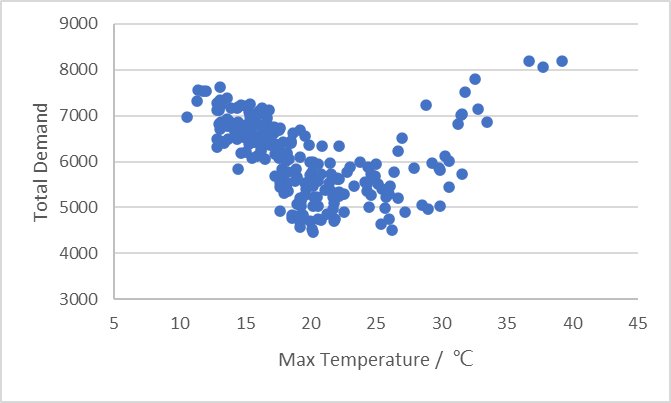

From the figure 1, we can tell that the minimum energy total demand corresponds between 20 ℃ and 25 ℃. This is reasonable because this is the most comfortable temperature range. People will need heater in colder days and air conditioner in hotter days, which result in an increasement of the energy usage.

In [3]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


'''
This python file is used to develop a Multiple Regression model to predict the maximum daily energy usage 
based on the weather data.
''' 
# Read CSV file into pandas dataframe
dataset = pd.read_csv('max_demand_price_weather.csv')

# Extract the most related features and define the classlabel
features = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Sunshine (hours)','Evaporation (mm)']]
classlabel = dataset['TOTALDEMAND']

# Set the features_train, features_test, class_train, class_test
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, test_size=0.2,  random_state=8)
lm = linear_model.LinearRegression()
model = lm.fit(features_train, class_train)

# Print the coefficent and intercept
print(lm.coef_, lm.intercept_)

# Print the r2 value
r2_test = lm.score(features_test, class_test)
print(r2_test)

[-155.1146706    43.31684545  -53.00807496   39.91744192] 7122.992735933612
0.466943520215124


### 3.2 Decision tree model to predict the maximum daily price category based on the provided weather data.

0.4897959183673469
[Text(697.5, 951.3000000000001, 'Minimum temperature (°C) <= 12.15\nentropy = 1.977\nsamples = 193\nvalue = [34, 55, 52, 52]'), Text(348.75, 679.5, 'Maximum temperature (°C) <= 19.85\nentropy = 1.66\nsamples = 121\nvalue = [3, 25, 43, 50]'), Text(174.375, 407.70000000000005, 'Sunshine (hours) <= 9.05\nentropy = 1.438\nsamples = 101\nvalue = [0, 14, 40, 47]'), Text(87.1875, 135.89999999999998, 'entropy = 1.367\nsamples = 90\nvalue = [0, 9, 38, 43]'), Text(261.5625, 135.89999999999998, 'entropy = 1.495\nsamples = 11\nvalue = [0, 5, 2, 4]'), Text(523.125, 407.70000000000005, 'Minimum temperature (°C) <= 10.55\nentropy = 1.706\nsamples = 20\nvalue = [3, 11, 3, 3]'), Text(435.9375, 135.89999999999998, 'entropy = 1.557\nsamples = 7\nvalue = [2, 2, 0, 3]'), Text(610.3125, 135.89999999999998, 'entropy = 1.14\nsamples = 13\nvalue = [1, 9, 3, 0]'), Text(1046.25, 679.5, 'Sunshine (hours) <= 1.5\nentropy = 1.568\nsamples = 72\nvalue = [31, 30, 9, 2]'), Text(871.875, 407.70000000

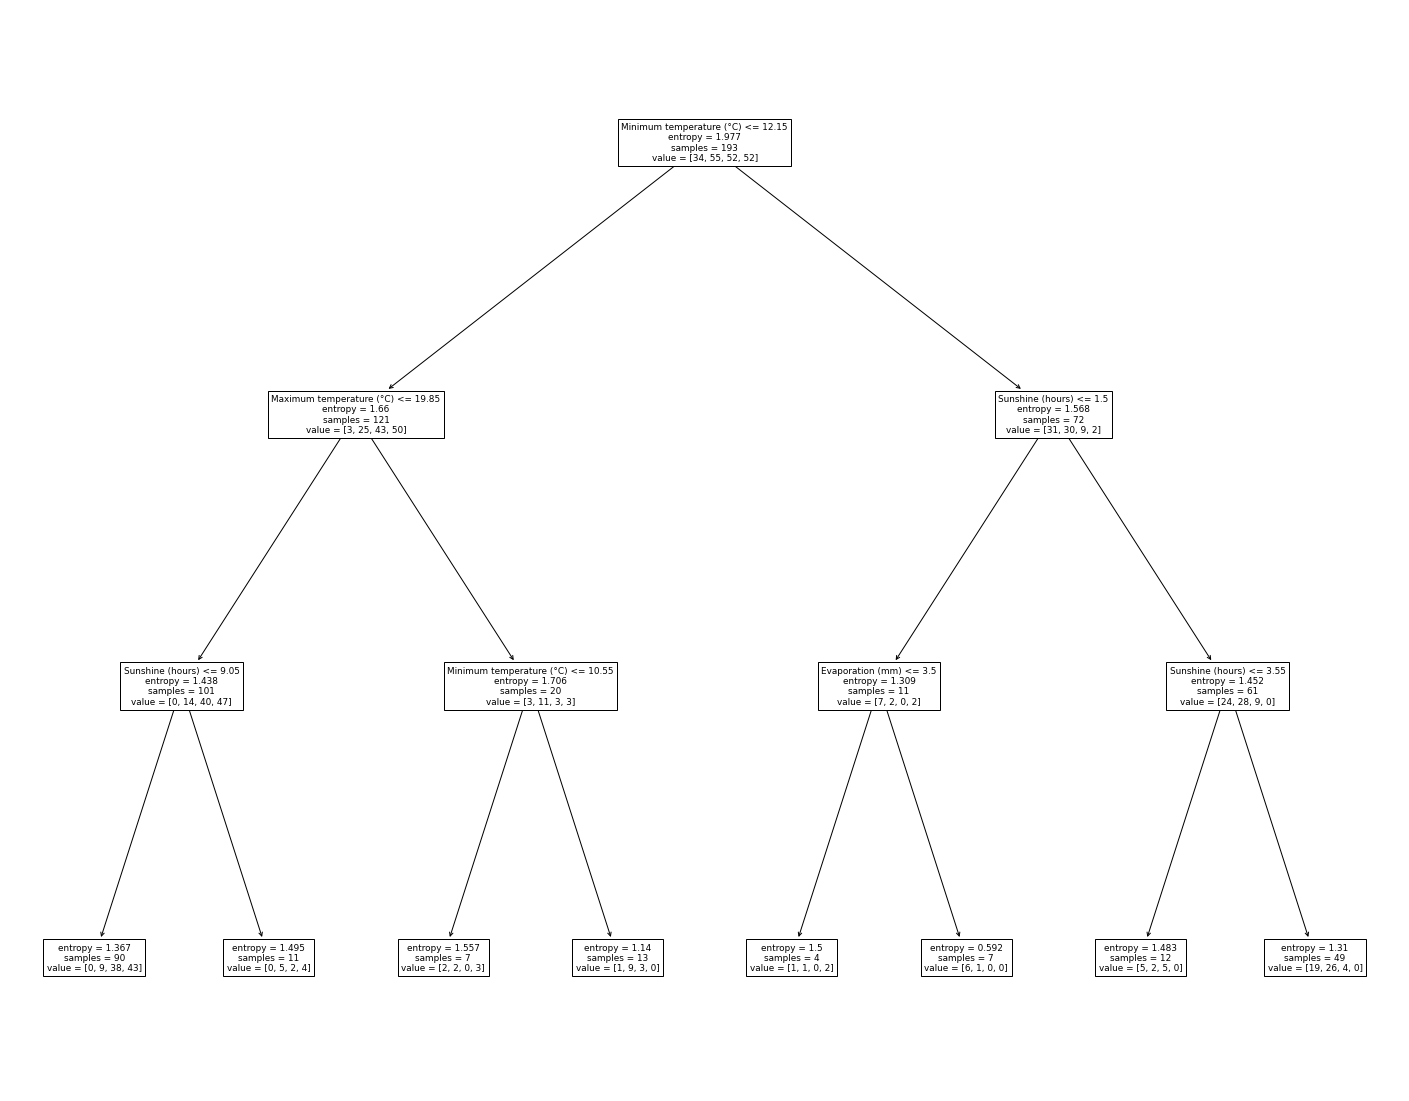

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree


dataset = pd.read_csv('max_demand_price_weather.csv')
# display(dataset.head())

# A model which predicts the maximum daily price category based on the provided weather data.
# decision tree

features = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Sunshine (hours)','Evaporation (mm)']]
classlabel = dataset['Price']


features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, test_size=0.2, random_state=41)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1) #
dt.fit(features_train, class_train)

predictions = dt.predict(features_test)
print(accuracy_score(class_test, predictions))

# Plot the decision tree
fig = plt.figure(figsize=(25, 20))
featurenames = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Sunshine (hours)','Evaporation (mm)']
print(tree.plot_tree(dt, feature_names = featurenames))

### 3.3 KNN model to predict the maximum daily price category based on the provided weather data.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# A model which predicts the maximum daily price category based on the provided weather data.
# KNN model

##load in the data
dataset=pd.read_csv('max_demand_price_weather.csv')

##get just the features
features = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Sunshine (hours)','Evaporation (mm)']]

##get just the class labels
classlabel = dataset['Price']

# randomly select 80% of the instances to be training and the rest to be testing
features_train, features_test, class_train, class_test = train_test_split(features, classlabel, train_size=0.8, test_size=0.2, random_state=41)

# normalise the data to have 0 mean and unit variance using the library functions.
# This will help for later computation of distances between instances
scaler = preprocessing.StandardScaler().fit(features_train)
features_train=scaler.transform(features_train)
features_test=scaler.transform(features_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(features_train, class_train)

y_pred = knn.predict(features_test)
score = accuracy_score(class_test, y_pred)
print(score)

0.6530612244897959


In [8]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors, preprocessing
from sklearn.model_selection import KFold


dataset = pd.read_csv('max_demand_price_weather.csv')
# display(dataset.head())
features = dataset[['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Evaporation (mm)' , 'Sunshine (hours)' ]]
classlabel = dataset['Price']

k = 20
kf = KFold(n_splits=k, shuffle=True, random_state=42)
acc_scores = []

for train_index, test_index in kf.split(dataset):

    features_train = features.iloc[train_index, :]
    features_test = features.iloc[test_index, :]

    class_train = classlabel[train_index]
    class_test = classlabel[test_index]

    scaler = preprocessing.StandardScaler().fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)

    knn = neighbors.KNeighborsClassifier(n_neighbors=5)
    knn.fit(features_train, class_train)

    predictions = knn.predict(features_test)
    score = accuracy_score(class_test, predictions)
    acc_scores.append(score)
avg_acc_score = sum(acc_scores)/k
print(avg_acc_score)

0.47211538461538466


## 4. Results and Discussion

**Q5. Why are your results significant and valuable?**

**Q6. What are the limitations of your results and how can the project be improved for future?**